In [1]:
!pip install qiskit qiskit-aer pylatexenc matplotlib --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 74.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 59.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.7 MB/s eta 0:00:00


In [2]:
# --- Import core Qiskit and supporting packages ---
from qiskit import QuantumCircuit
from qiskit.circuit.library import RZGate, RXGate
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

import matplotlib.pyplot as plt
import numpy as np

In [3]:
# --- Parameters for the toy quantum field model ---
m = 1.0        # mass term
coupling = 0.5 # interaction strength
t = 1.0        # evolution time

print(f"Parameters: mass = {m}, coupling = {coupling}, time = {t}")

Parameters: mass = 1.0, coupling = 0.5, time = 1.0


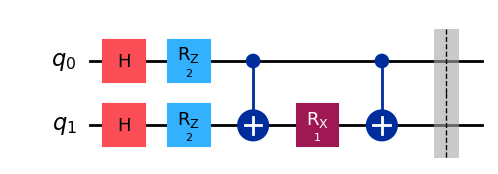

In [4]:
# --- Build circuit ---
qc = QuantumCircuit(2)

# Simulate "vacuum fluctuations"
qc.h(0)
qc.h(1)

# Simulate mass term with Z rotations
qc.rz(2 * m * t, 0)
qc.rz(2 * m * t, 1)

# Simulate interaction term with XX coupling
qc.cx(0, 1)
qc.rx(2 * coupling * t, 1)
qc.cx(0, 1)

qc.barrier()
qc.draw('mpl')

Statevector probabilities: {np.str_('00'): np.float64(0.44128685030857306), np.str_('01'): np.float64(0.4412868503085729), np.str_('10'): np.float64(0.058713149691426846), np.str_('11'): np.float64(0.05871314969142682)}


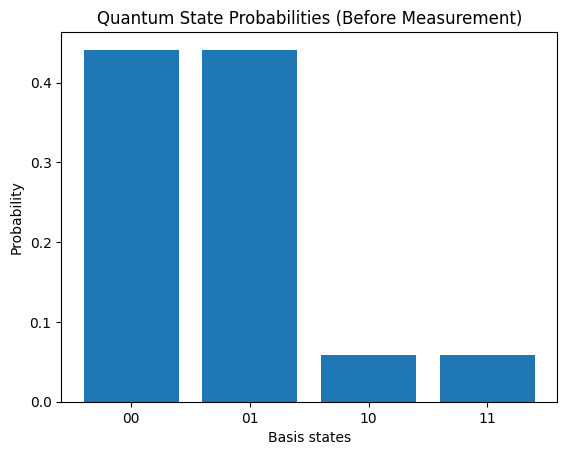

In [5]:
# --- Compute the statevector of the circuit ---
state = Statevector.from_instruction(qc)
probs = state.probabilities_dict()

print("Statevector probabilities:", probs)

# Plot state probabilities
fig, ax = plt.subplots()
ax.bar(probs.keys(), probs.values())
ax.set_xlabel("Basis states")
ax.set_ylabel("Probability")
ax.set_title("Quantum State Probabilities (Before Measurement)")
plt.show()

Measurement counts: {'11': 118, '10': 116, '00': 885, '01': 929}


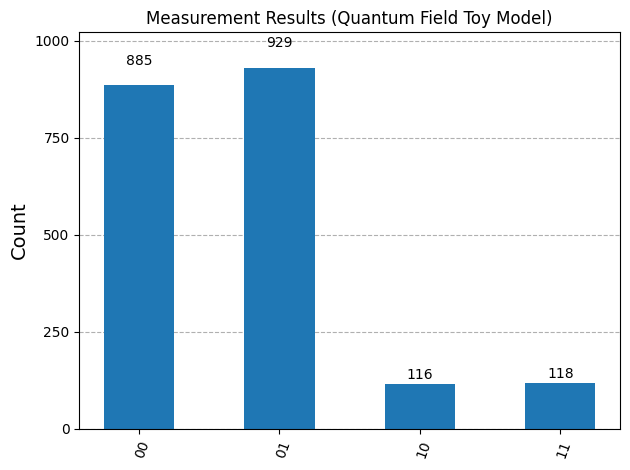

In [7]:
# --- Cell 6: Simulate and show measurement histogram (Colab-safe) ---

from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
from IPython.display import display
import matplotlib.pyplot as plt

# Create a copy of the circuit and add measurement
qc_meas = qc.copy()
qc_meas.measure_all()

# Initialize the simulator
sim = AerSimulator()

# Run circuit on simulator
shots = 2048
result = sim.run(qc_meas, shots=shots).result()
counts = result.get_counts()

# Print raw counts
print("Measurement counts:", counts)

# ✅ Display histogram (works reliably in Colab)
fig = plot_histogram(counts, title="Measurement Results (Quantum Field Toy Model)")
display(fig)     # ensures output in Colab, Jupyter, etc.
plt.show()       # forces Matplotlib to render inline

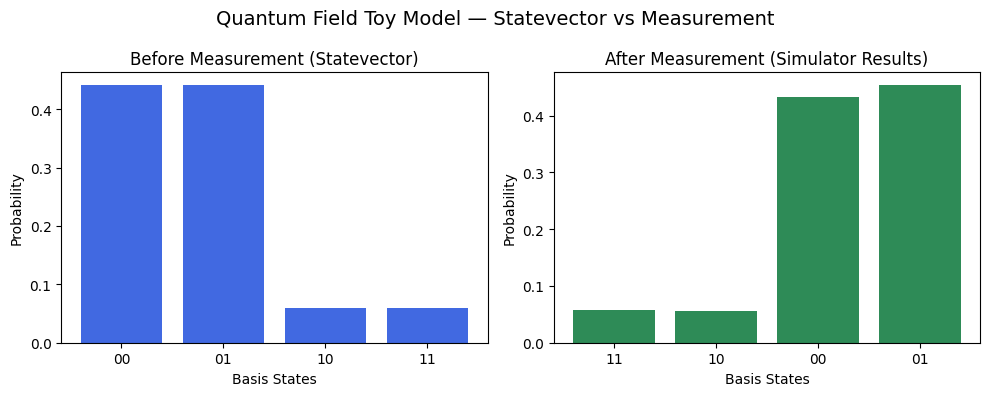

In [9]:
# --- Cell 7: Compare theoretical vs measured probabilities ---

from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
from IPython.display import display

# Convert statevector probabilities (from Cell 5) to same format as counts
state_probs = {k: round(v, 3) for k, v in probs.items()}  # round for clarity

# Normalize measured counts to probabilities
total_shots = sum(counts.values())
measured_probs = {k: v / total_shots for k, v in counts.items()}

# Create two subplots side-by-side
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Left: Theoretical probabilities
axes[0].bar(state_probs.keys(), state_probs.values(), color="royalblue")
axes[0].set_title("Before Measurement (Statevector)")
axes[0].set_xlabel("Basis States")
axes[0].set_ylabel("Probability")

# Right: Measured probabilities
axes[1].bar(measured_probs.keys(), measured_probs.values(), color="seagreen")
axes[1].set_title("After Measurement (Simulator Results)")
axes[1].set_xlabel("Basis States")
axes[1].set_ylabel("Probability")

plt.suptitle("Quantum Field Toy Model — Statevector vs Measurement", fontsize=14)
plt.tight_layout()
plt.show()
